In [ ]:
import pandas as pd

df = pd.read_excel('/content/CLC Data_s.xlsx')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)  # you need to import these in order to have a PDP plot

# Get feature names from DataFrame columns
feature_names = df.columns[:-2]  # exclude the last two columns which are the output variables

print(df.columns)

Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
       'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR', 'H2 (wt.%)',
       'Char yield (wt.%)'],
      dtype='object')


In [ ]:
# Select the desired input features
feature_names = ['C (%)', 'H (%)', 'N (%)', 'O (%)', 'S (%)', 'VM (%)', 'Ash (%)',
                 'FC (%)', 'Moisture (%)', 'T (°C)', 'OC (%)', 'SBR']

# Split data into input (X) and output (y) variables

X = df[feature_names]
y1 = df['H2 (wt.%)']
y2 = df['Char yield (wt.%)']

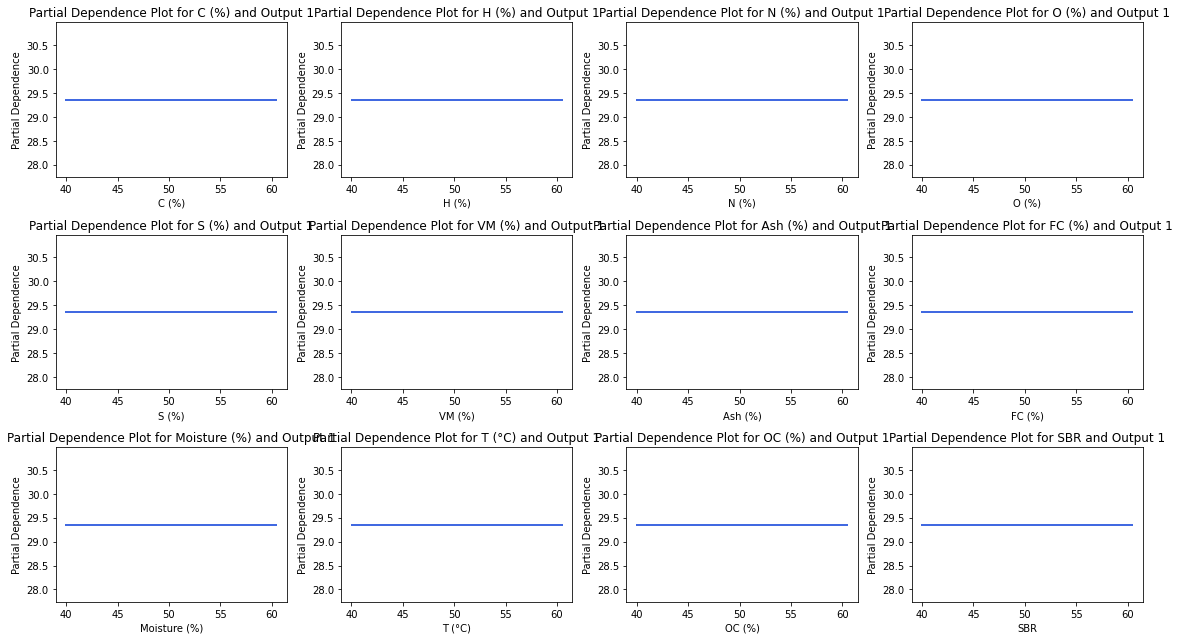

In [ ]:
# # Fit GBR model for output 1
# gbr_y1 = GradientBoostingRegressor()
# gbr_y1.fit(X, y1)

# # Define grid for partial dependence plot
# grid_resolution = 50  # increase or decrease this number for more or fewer grid points
# grid_values = np.linspace(df[feature_names[0]].min(), df[feature_names[0]].max(), grid_resolution)

# # Plot partial dependence line plots for each input variable for output 1
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 9))
# for i, ax in enumerate(axes.flatten()):
#     x = X[:, i]
#     y = gbr_y1.predict(X)
#     pdp_values = []
#     for val in grid_values:
#         x_temp = x.copy()
#         x_temp[:] = val
#         y_temp = gbr_y1.predict(X)
#         pdp_values.append(y_temp.mean())
#     ax.plot(grid_values, pdp_values, color='royalblue', linewidth=2)
#     ax.set_xlabel(feature_names[i])
#     ax.set_ylabel('Partial Dependence')
#     ax.set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 1')
# plt.tight_layout()
# plt.show()

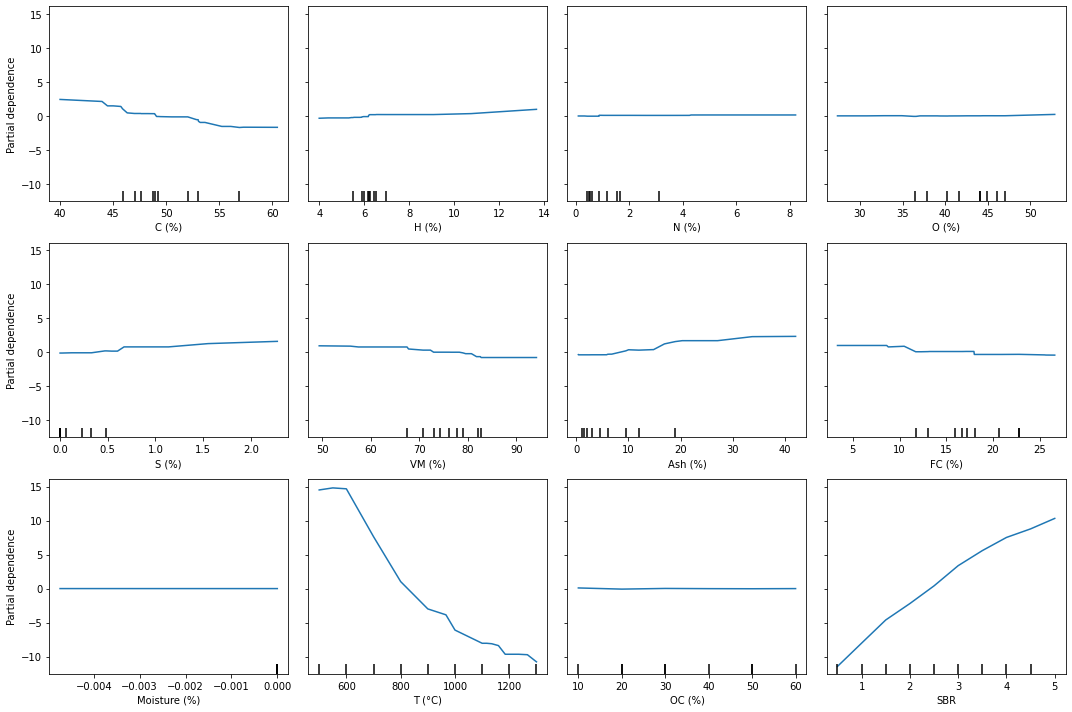

In [ ]:
my_model = GradientBoostingRegressor()
my_model.fit(X, y1)
n_cols = 4
n_rows = int(len(X.columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10))
PartialDependenceDisplay.from_estimator(my_model, X, X.columns, ax=ax, n_cols=n_cols,grid_resolution=50)
#fig.suptitle('Partial Dependence Plots')
fig.tight_layout();

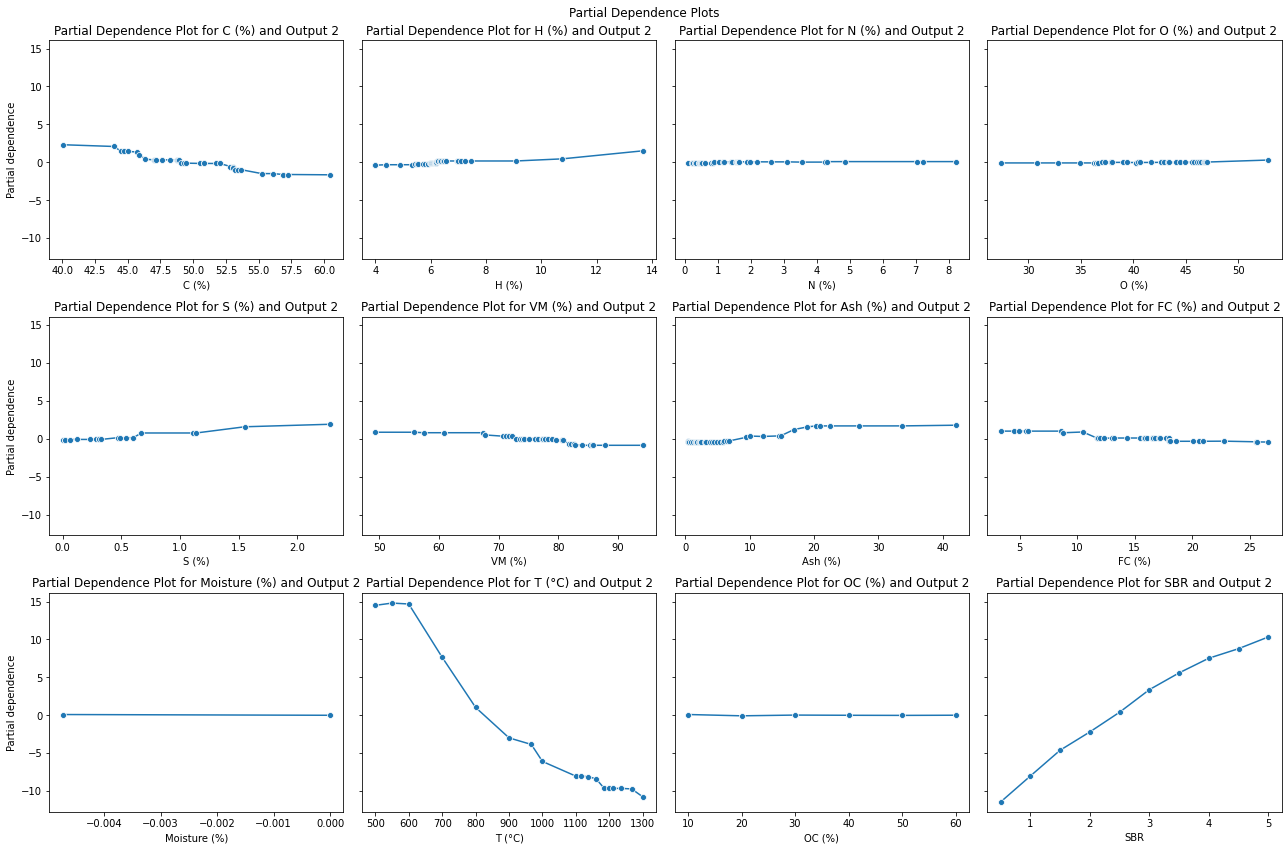

In [ ]:

# PDPs plots from the raw values extracted with partial_dependence
my_model1 = GradientBoostingRegressor()
my_model1.fit(X, y1)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,12), sharey=True)
for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model1, X, i, kind='average')
    loc = i//n_cols, i%n_cols
    sns.lineplot(x=raw_values['values'][0], 
                 y=raw_values['average'][0], ax=ax[loc], style=0, 
                 markers=True, legend=False)
    ax[loc].set_xlabel(x)
    ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2')
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

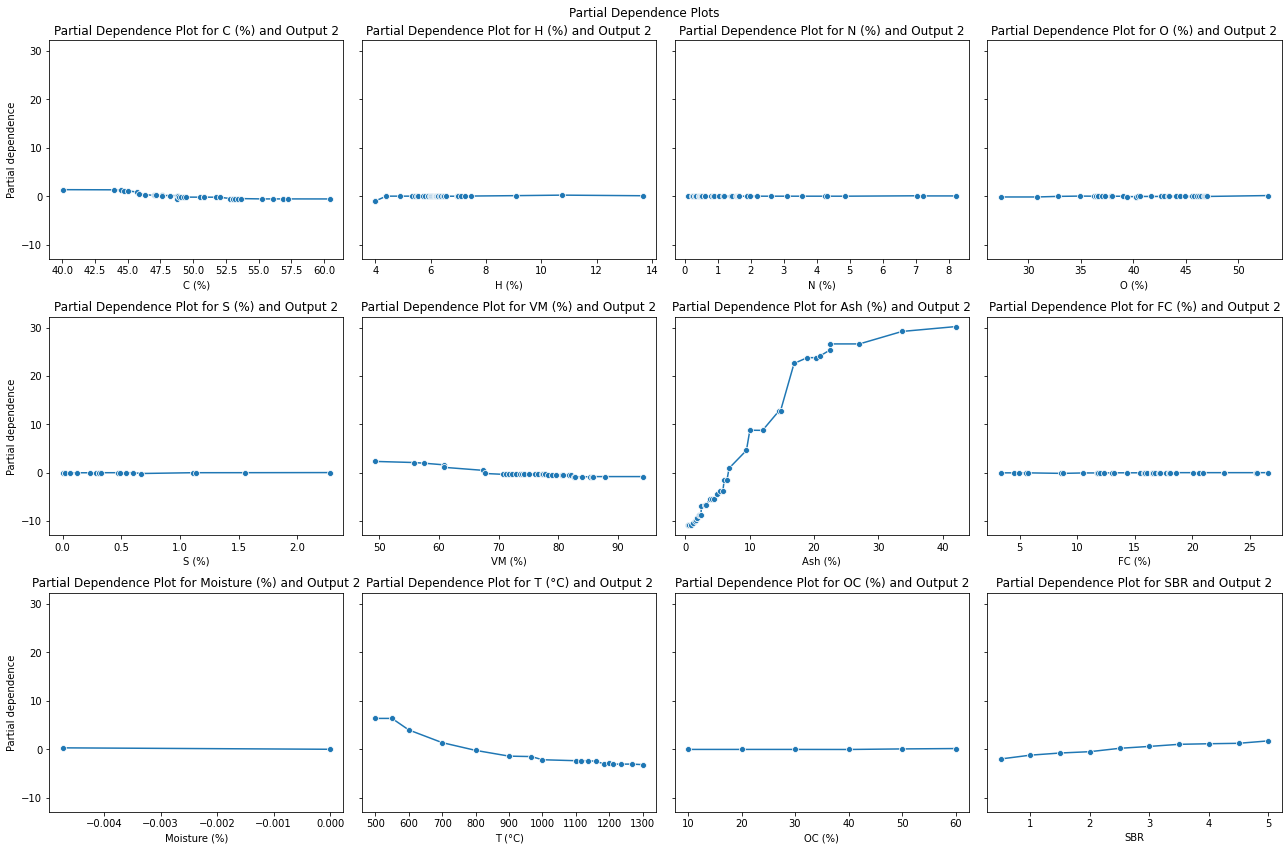

In [ ]:
my_model2= GradientBoostingRegressor()
my_model2.fit(X, y2)
# PDPs plots from the raw values extracted with partial_dependence
fig, ax = plt.subplots(n_rows, n_cols, figsize=(18,12), sharey=True)
for i, x in enumerate(X.columns):
    raw_values = partial_dependence(my_model2, X, i, kind='average')
    loc = i//n_cols, i%n_cols
    sns.lineplot(x=raw_values['values'][0], 
                 y=raw_values['average'][0], ax=ax[loc], style=0, 
                 markers=True, legend=False)
    ax[loc].set_xlabel(x)
    ax[loc].set_title(f'Partial Dependence Plot for {feature_names[i]} and Output 2')
    if i%n_cols==0:
        ax[loc].set_ylabel('Partial dependence')
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

In [ ]:
def plot_train_set(y_train_df,y_train_pred_df,y_test_df,y_test_pred_df):
  """ A function that plots the comparison of the predictions of the various target variables for a ML models 
      fitted from the training set and testing set.
      params:
      y_train_df: A dataframe containing the original training dataset
      y_train_pred_df: A dataframe containing the predictions for the training dataset,
      y_test_df:  A dataframe containing the original testing dataset
      y_test_pred_df: A dataframe containing the predictions for the testing dataset 
  """

  plt.rcParams.update({'font.size': 10})
  fig, ax = plt.subplots(1, 1, figsize=(16,8))

  ax.scatter(y_train_df, y_train_pred_df)
  ax.scatter(x=y_test_df, y=y_test_pred_df,color='red',marker='o')

  # add straight line
  line = np.linspace(np.min(y_train_df.to_numpy()),np.max(y_train_df.to_numpy()))
  ax.plot(line, line, linewidth=1.5,color='orange', zorder=4)
  # Add error regions
  ax.fill_between(line, line - 0.12, line + 0.12, color='grey',linestyle='dashed',alpha = 0.05) # 12% error
  #ax.fill_between(line, line - 0.2, line + 0.2,color ='blue',linestyle='dashed', alpha = 0.3) # 20% error
  # set labels
  ax.set(xlabel=f'Measured', ylabel=f'Predicted')
  ax.legend(loc='upper left', labels=['Training Set', 'Testing Set', 'X - Y','12% deviation line'])
  plt.tight_layout()
  plt.show()

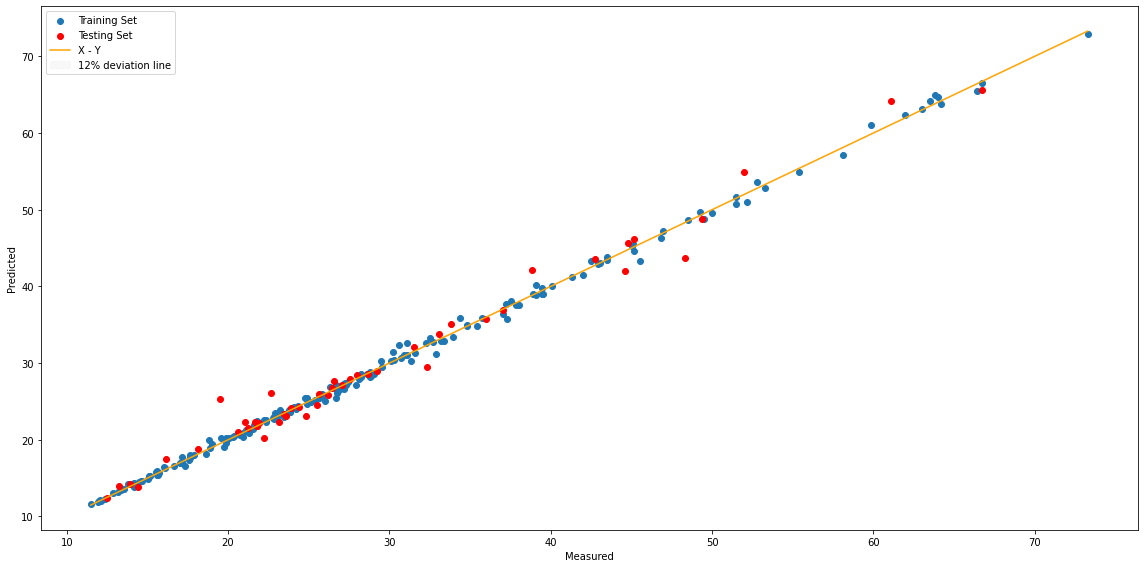

In [ ]:
# for y1
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
my_model1 = GradientBoostingRegressor()
my_model1.fit(X_train, y_train)
y_test_pred = my_model1.predict(X_test)
y_train_pred = my_model1.predict(X_train)

plot_train_set(y_train,y_train_pred,y_test,y_test_pred)

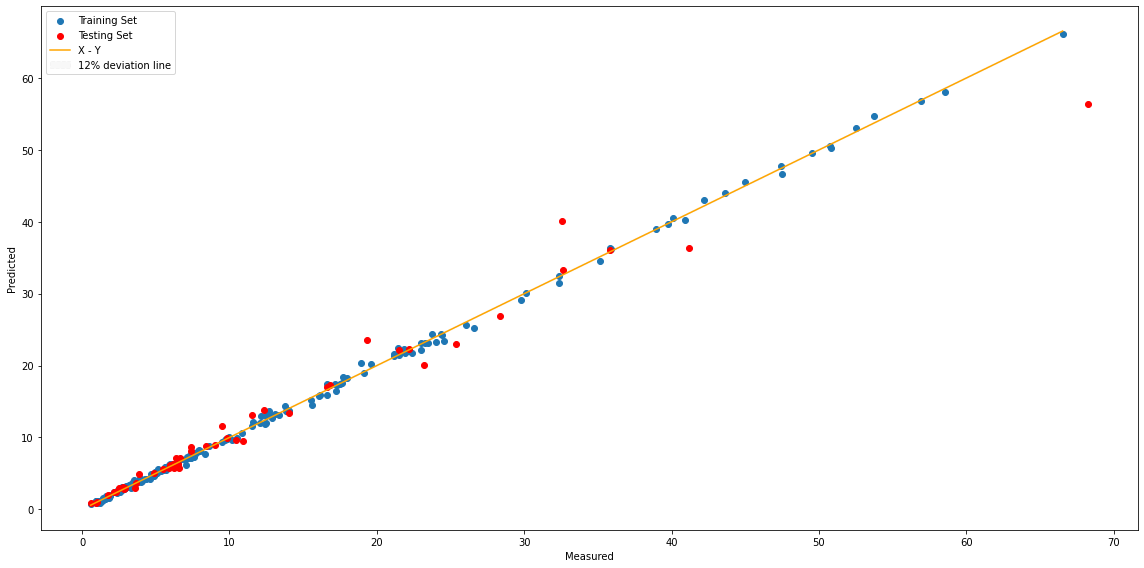

In [ ]:
# for y2
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)
my_model2 = GradientBoostingRegressor()
my_model2.fit(X_train, y_train)
y_test_pred = my_model2.predict(X_test)
y_train_pred = my_model2.predict(X_train)

plot_train_set(y_train,y_train_pred,y_test,y_test_pred)